*best viewed in [nbviewer](https://nbviewer.jupyter.org/github/CambridgeSemiticsLab/BH_time_collocations/blob/master/results/notebooks/demonstrative_tenses.ipynb)*

# Tense Collocations with Demonstratives
## Investigating the Effects of Distance
### Cody Kingham
<a href="../../docs/sponsors.md"><img height=200px width=200px align='left' src="../../docs/images/CambridgeU_BW.png"></a>

In [1]:
! echo "last updated:"; date

last updated:
Tue 25 Feb 2020 13:57:37 GMT


## Introduction

Demonstrative adjectives such as הוא "that (m)", היא "that (f)", זה "this", זאת "these", occur frequently within time adverbials headed by a nominal element. These demonstratives also correspond with a contiuum of "near" versus "far" within a conceptual space. An event which is marked with הוא "that", for instance, is an event in the distant past or future relative to speech time, while an event marked with זה "this" is one which is near to the present of speech time. In this notebook, we will investigate how these opposite poles affect verb collocation tendencies.  

The investigation must also involve an examination of the prepositional lexemes that potentially direct these adverbials. For instance, the phrase עד היום הזה "unto this day" represents an event as extended over a time ending at the present. This kind of phrase should be classified differently from the similar phrase היום הזה "this day", which contains no extent and conveys only a single position near the present. The same issues could be said for phrases such as ביום הוא "in that day", a point in time in the future, versus עד היום ההוא "unto that day", an extended time ending in the future. 

Because demonstratives will be used with nominalized elements that have no inherent temporal anchor, we can assume that the lexeme of the time-word will matter less for the analysis. The position of the time-word in the conceptual space is fully reliant on the demonstrative element. 

### Relation to prototypical adverb collocations

In the notebook on [yiqtol associations with adverbs](https://nbviewer.jupyter.org/github/CambridgeSemiticsLab/BH_time_collocations/blob/master/results/notebooks/yqtl_association_with_advb.ipynb) we found that prototypical adverbs such as עולם "forever", נצח "duration", מחר "tomorrow", מתי "when", עוד "still", have a strong preference for collocating with the yiqtol. One possibility to explain this pattern is that these adverbials generally indicate open ended times in the future. The interrogative מתי is indeed different from the other cases, but it does share a common attribute of being unbounded (perhaps most explicitly so!). מחר is likewise different. Though it shares the property of being future oriented, does it also share the characteristic of unboundedness? 

Since this notebook focuses on nominal time adverbials, we will not see many of these prototypical adverbs. This also provides an opportunity to compare the collocation profiles of these phrases against the yiqtol preference for unbounded futuristic time adverbials. Do we see a similar phenomenon in the demonstratives?

<hr>

# Python

Now we import the modules and data needed for the analysis.

In [2]:
# standard & data science packages
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.serif'] = ['SBL Biblit']
import seaborn as sns
from bidi.algorithm import get_display # bi-directional text support for plotting
from paths import main_table, figs

# custom packages (see /tools)
from tf_tools.load import load_tf
from stats.significance import contingency_table, apply_fishers

# launch Text-Fabric with custom data
TF, API, A = load_tf(silent='deep')
A.displaySetup(condenseType='phrase')
F, E, T, L = A.api.F, A.api.E, A.api.T, A.api.L # corpus analysis methods

# load and set up project dataset
times_full = pd.read_csv(main_table, sep='\t')
times_full.set_index(['node'], inplace=True)
times = pd.DataFrame(times_full[~times_full.classi.str.contains('component')]) # select singles

## Data Exploration

Below we look at how often the demonstratives in question appear:

In [4]:
times.demon_dist.count()

483

This ^ is the number of non-null values contained in the dataset. Below we calculate the proportional representation out of all time adverbials.

In [5]:
times.demon_dist.count() / times.shape[0]

0.12634057023280146

These represent $13\%$ of the whole dataset. That is a non-trivial proportion. This already shows that the demonstrative construction plays a key role in Biblical Hebrew time adverbial phrases.

Here is how the values break down:

In [6]:
times.demon_dist.value_counts()

far     325
near    158
Name: demon_dist, dtype: int64

## Collocation Dataset

Now we will build a collocation dataset between the demonstrative categories, preposition lexemes, and verb tenses. First we create a composite column by adding the leading preposition string to the demonstrative.

In [7]:
times['prep_demon'] = times.leading_prep.fillna('ø') + '|' + times.demon_dist

We can have a look at the new column's discrete values below.

In [8]:
times['prep_demon'].value_counts()

ב|far       312
עד|near      74
ø|near       31
ב|near       30
אחר|near     12
כ|near        8
עד|far        6
ø|far         3
מן|far        2
ל|near        2
מן|near       1
ל|far         1
אחר|far       1
Name: prep_demon, dtype: int64

Now we can construct a collocation pivot table with the verb tenses. We set aside the infinitives and imperatives. We also drop those cases with < 5 occurrences.

In [9]:
tense_collocations = pd.pivot_table(
    times, index='prep_demon', columns='tense', 
    aggfunc='size',
    fill_value=0,
).drop(['infc','impv'], 1)

tense_collocations = tense_collocations[tense_collocations.sum(1) >= 5]

tense_collocations

tense,ptcp,qtl,wqtl,wyqtl,yqtl
prep_demon,,,,,
ø|near,1,14,2,1,8
אחר|near,0,3,0,8,0
ב|far,9,75,33,107,75
ב|near,3,9,3,6,8
עד|far,0,6,0,0,0
עד|near,2,24,0,37,4


Let's look at the ratios.

In [10]:
tense_ratios = tense_collocations.divide(tense_collocations.sum(1), axis=0)

tense_ratios

tense,ptcp,qtl,wqtl,wyqtl,yqtl
prep_demon,,,,,
ø|near,0.038462,0.538462,0.076923,0.038462,0.307692
אחר|near,0.000000,0.272727,0.000000,0.727273,0.000000
ב|far,0.030100,0.250836,0.110368,0.357860,0.250836
ב|near,0.103448,0.310345,0.103448,0.206897,0.275862
עד|far,0.000000,1.000000,0.000000,0.000000,0.000000
עד|near,0.029851,0.358209,0.000000,0.552239,0.059701


And the associations.

In [11]:
tense_assocs, odds = apply_fishers(tense_collocations, 0, 1)

tense_assocs

,ptcp,qtl,wqtl,wyqtl,yqtl
ø|near,0.216961,1.881345,0.000000,-3.734400,0.489646
אחר|near,0.000000,0.000000,-0.214813,1.677211,-0.880711
ב|far,-0.241526,-2.783947,2.001001,-0.125057,1.901494
ב|near,1.159511,-0.000000,0.136607,-1.124000,0.315830
עד|far,0.000000,3.180720,0.000000,-1.040717,-0.458765
עד|near,0.000000,0.602223,-2.733158,3.088714,-3.499566


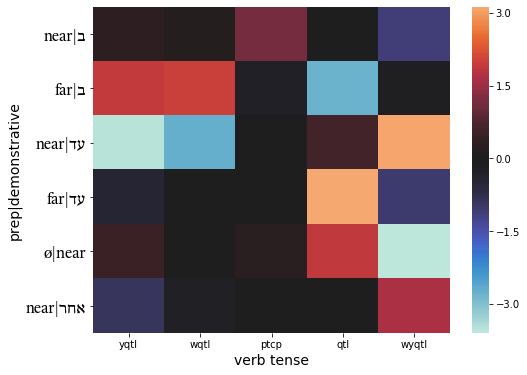

In [27]:
fig = plt.figure(figsize=(8, 6))
# reorder elements for analysis
plot_data = tense_assocs.loc[
    ['ב|near', 'ב|far', 'עד|near', 'עד|far', 'ø|near', 'אחר|near'],
    ['yqtl', 'wqtl', 'ptcp', 'qtl', 'wyqtl']
]
ax = sns.heatmap(plot_data, center=0, robust=True)
ax.set_yticklabels([get_display(t) for t in plot_data.index], size=16, rotation=0, fontfamily='serif')
ax.set_ylabel('prep|demonstrative', size=14)
ax.set_xlabel('verb tense', size=14)
plt.show()

We can see two important patterns in the graph. Those patterns can be summarized in the following table:

|adverbial|association|
|---------|-----------|
|  yqtl   |  ב\|far |
|  wqtl   |  ב\|far |
|  qtl    | עד\|far |
|  qtl    | ø\|near |
|  wyqtl  | עד\|near|
| wyqtl   | אחר\|near|
|  ptcp   | ב\|near |





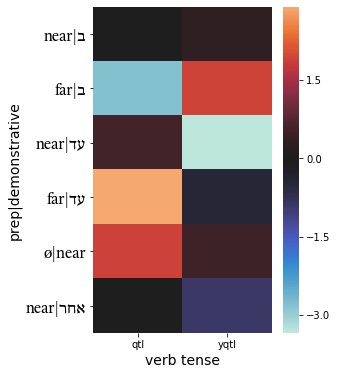

In [31]:
fig = plt.figure(figsize=(4, 6))
# reorder elements for analysis
plot_data = tense_assocs.loc[
    ['ב|near', 'ב|far', 'עד|near', 'עד|far', 'ø|near', 'אחר|near'],
    ['qtl', 'yqtl']
]
ax = sns.heatmap(plot_data, center=0, robust=True)
ax.set_yticklabels([get_display(t) for t in plot_data.index], size=16, rotation=0, fontfamily='serif')
ax.set_ylabel('prep|demonstrative', size=14)
ax.set_xlabel('verb tense', size=14)
plt.show()

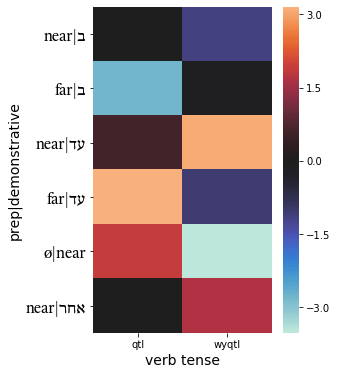

In [32]:
fig = plt.figure(figsize=(4, 6))
# reorder elements for analysis
plot_data = tense_assocs.loc[
    ['ב|near', 'ב|far', 'עד|near', 'עד|far', 'ø|near', 'אחר|near'],
    ['qtl', 'wyqtl']
]
ax = sns.heatmap(plot_data, center=0, robust=True)
ax.set_yticklabels([get_display(t) for t in plot_data.index], size=16, rotation=0, fontfamily='serif')
ax.set_ylabel('prep|demonstrative', size=14)
ax.set_xlabel('verb tense', size=14)
plt.show()

Based on these graphs above we can see a possible two-part opposition:

|  |near|far|
|--|----|---|
|**point (ב/ø)**| qtl | yqtl |
|**extent (עד)**| wyqtl | qtl |

We should be careful, though. While the עד|near adverbial is associated with wyqtl, it is not at all absent from qtl, with $24$ attested uses. Yet, given the overall frequency of qtl and the overall frequency of the עד|near adverbial, the use with wyqtl is significant. 

### Export Inspections

In [24]:
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_row', 100)

In [28]:
times[(times.prep_demon == 'ב|far') & (times.tense == 'wyqtl')][['text', 'clause']].head(50)

,text,clause
node,,
1446925,גַּ֣ם בַּלַּ֧יְלָה הַה֛וּא,וַתַּשְׁקֶ֜יןָ גַּ֣ם בַּלַּ֧יְלָה הַה֛וּא אֶת־אֲבִיהֶ֖ן יָ֑יִן
1446934,בָּעֵ֣ת הַהִ֔וא,וַֽיְהִי֙ בָּעֵ֣ת הַהִ֔וא
1446960,בַּשָּׁנָ֥ה הַהִ֖וא,וַיִּמְצָ֛א בַּשָּׁנָ֥ה הַהִ֖וא מֵאָ֣ה שְׁעָרִ֑ים
1446965,בַּלַּ֣יְלָה הַה֔וּא,וַיֵּרָ֨א אֵלָ֤יו יְהוָה֙ בַּלַּ֣יְלָה הַה֔וּא
1446967,בַּיֹּ֣ום הַה֗וּא,וַיְהִ֣י׀ בַּיֹּ֣ום הַה֗וּא
1447004,בַּיֹּום֩ הַה֨וּא,וַיָּ֣סַר בַּיֹּום֩ הַה֨וּא אֶת־הַתְּיָשִׁ֜ים הָֽעֲקֻדִּ֣ים וְהַטְּלֻאִ֗ים וְאֵ֤ת כָּל־הָֽעִזִּי...
1447024,בַּלַּ֣יְלָה הַה֑וּא,וַיָּ֥לֶן שָׁ֖ם בַּלַּ֣יְלָה הַה֑וּא
1447033,בַּיֹּ֨ום הַה֥וּא,וַיָּשָׁב֩ בַּיֹּ֨ום הַה֥וּא עֵשָׂ֛ו לְדַרְכֹּ֖ו שֵׂעִֽירָה׃
1447046,בָּעֵ֣ת הַהִ֔וא,וַֽיְהִי֙ בָּעֵ֣ת הַהִ֔וא


In [35]:
times[(times.prep_demon == 'עד|near') & (times.tense == 'wyqtl')][['ref', 'text', 'clause']].to_csv('../tables/inspect/<d_near_wyqtl.tsv', sep='\t', encoding='utf-16')